In [1]:
pip install numpy matplotlib ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.3 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Generate some sample data
np.random.seed(42)
num_points = 20
x=10*np.random.normal(0,1,num_points)
y=10*(x**2)+np.random.normal(-400,400,num_points)

# Function to fit and plot polynomial regression
def plot_polynomial_regression(degree):
    coefficients = np.polyfit(x, y, degree)
    polynomial = np.poly1d(coefficients)
    y_pred = polynomial(x)

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, label="Data")
    plt.plot(np.sort(x), y_pred[np.argsort(x)], color='red', label="Polynomial Regression (Degree {})".format(degree))
    plt.legend()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Polynomial Regression")

# Create an interactive widget for degree selection
degree_slider = widgets.IntSlider(value=1, min=1, max=10, step=1, description='Degree')

# Create a function to update the plot when the slider is moved
def update_plot(change):
    clear_output()
    display(degree_slider, output)

degree_slider.observe(update_plot, 'value')

# Create an interactive output
output = widgets.interactive_output(plot_polynomial_regression, {'degree': degree_slider})

# Display the widgets and the output
display(degree_slider, output)

IntSlider(value=10, description='Degree', max=10, min=1)

Output()

IntSlider(value=9, description='Degree', max=10, min=1)

FloatSlider(value=1.0, description='Regularization (Alpha)', step=1.0)

Button(description='Reset Plot', style=ButtonStyle())

Output()

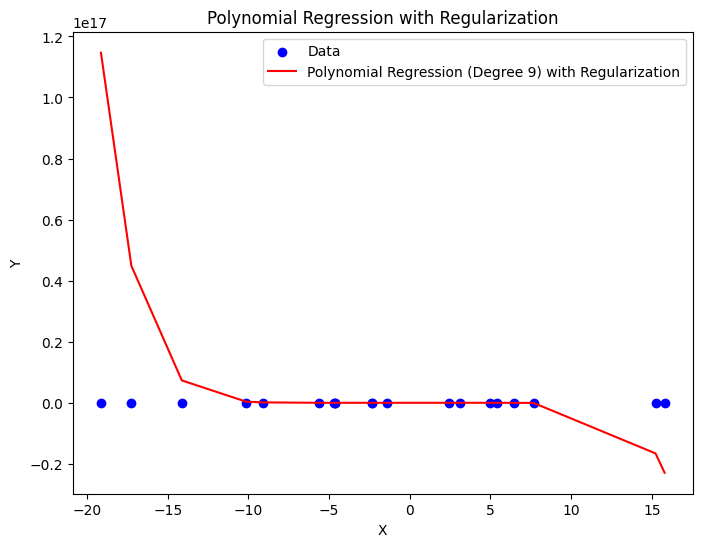

In [ ]:
'''THIS IS NOT WORKING YET!!'''


import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Generate some sample data
np.random.seed(42)
num_points = 20
x = 10 * np.random.normal(0, 1, num_points)
y = 10 * (x**2) + np.random.normal(-400, 400, num_points)

# Function to fit and plot polynomial regression with regularization
def plot_polynomial_regression(degree, alpha=0):
    # Fit polynomial regression with regularization
    coefficients = np.polyfit(x, y, degree)
    polynomial = np.poly1d(coefficients)

    # Add regularization term to the coefficients
    regularization_term = alpha * np.sum(coefficients**2)
    coefficients -= regularization_term

    # Update y_pred with the regularized polynomial
    y_pred = np.polyval(coefficients, x)

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, label="Data", color='blue')
    plt.plot(np.sort(x), y_pred[np.argsort(x)], color='red', label="Polynomial Regression (Degree {}) with Regularization".format(degree))
    plt.legend()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Polynomial Regression with Regularization")

# Create an interactive widget for degree selection and regularization strength
degree_slider = widgets.IntSlider(value=1, min=1, max=10, step=1, description='Degree')
alpha_slider = widgets.FloatSlider(value=0, min=0, max=100, step=1, description='Regularization (Alpha)')

# Create a button to reset the plot
reset_button = widgets.Button(description='Reset Plot')

# Create a function to reset the plot
def reset_plot(button):
    degree_slider.value = 1
    alpha_slider.value = 0

reset_button.on_click(reset_plot)

# Create a function to update the plot when the sliders are moved
def update_plot(change):
    clear_output()
    display(degree_slider, alpha_slider, reset_button, output)

degree_slider.observe(update_plot, 'value')
alpha_slider.observe(update_plot, 'value')

# Create an interactive output
output = widgets.interactive_output(plot_polynomial_regression, {'degree': degree_slider, 'alpha': alpha_slider})

# Display the widgets and the output
display(degree_slider, alpha_slider, reset_button, output)
